## IMPORTING IMPORTANT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import calendar

from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, roc_auc_score
import xgboost as xgb
from xgboost import XGBClassifier


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
df1=pd.read_csv("Loan_Status_test.csv")
df2=pd.read_csv("Loan_Status_train.csv")

In [4]:
merged_data=pd.concat([df1,df2],ignore_index=True)

In [5]:
print(merged_data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
1    LP001022    Male     Yes          1      Graduate            No   
2    LP001031    Male     Yes          2      Graduate            No   
3    LP001035    Male     Yes          2      Graduate            No   
4    LP001051    Male      No          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
976  LP002978  Female      No          0      Graduate            No   
977  LP002979    Male     Yes         3+      Graduate            No   
978  LP002983    Male     Yes          1      Graduate            No   
979  LP002984    Male     Yes          2      Graduate            No   
980  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                0.0       110.0           

In [6]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [7]:
data=merged_data

In [8]:
## Data processing and visualisation

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 981 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            981 non-null    object 
 1   Gender             957 non-null    object 
 2   Married            978 non-null    object 
 3   Dependents         956 non-null    object 
 4   Education          981 non-null    object 
 5   Self_Employed      926 non-null    object 
 6   ApplicantIncome    981 non-null    int64  
 7   CoapplicantIncome  981 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   961 non-null    float64
 10  Credit_History     902 non-null    float64
 11  Property_Area      981 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 99.8+ KB


In [10]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,981.000000,981.000000,954.000000,961.000000,902.000000
mean,5179.795107,1601.916330,142.511530,342.201873,0.835920
std,5695.104533,2718.772806,77.421743,65.100602,0.370553
min,0.000000,0.000000,9.000000,6.000000,0.000000
25%,2875.000000,0.000000,100.000000,360.000000,1.000000
50%,3800.000000,1110.000000,126.000000,360.000000,1.000000
75%,5516.000000,2365.000000,162.000000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [11]:
data.isnull().sum()

Loan_ID                0
Gender                24
Married                3
Dependents            25
Education              0
Self_Employed         55
ApplicantIncome        0
CoapplicantIncome      0
LoanAmount            27
Loan_Amount_Term      20
Credit_History        79
Property_Area          0
Loan_Status          367
dtype: int64

In [12]:
data["Gender"]=data["Gender"].fillna( data["Gender"].dropna().mode().values[0])
data["Married"]=data["Married"].fillna(data["Married"].dropna().mode().values[0])
data["Dependents"]=data["Dependents"].fillna(data["Dependents"].dropna().mode().values[0])
data["Self_Employed"]=data["Self_Employed"].fillna(data["Self_Employed"].dropna().mode().values[0])
data["LoanAmount"]=data["LoanAmount"].fillna(data["LoanAmount"].dropna().median())
data["Loan_Amount_Term"]=data["Loan_Amount_Term"].fillna(data["Loan_Amount_Term"].dropna().mode().values[0])
data["Credit_History"]=data["Credit_History"].fillna(data["Credit_History"].dropna().mode().values[0])
data["Loan_Status"]=data["Loan_Status"].fillna(data["Loan_Status"].dropna().mode().values[0])

In [13]:
data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [14]:
print(data)

      Loan_ID  Gender Married Dependents     Education Self_Employed  \
0    LP001015    Male     Yes          0      Graduate            No   
1    LP001022    Male     Yes          1      Graduate            No   
2    LP001031    Male     Yes          2      Graduate            No   
3    LP001035    Male     Yes          2      Graduate            No   
4    LP001051    Male      No          0  Not Graduate            No   
..        ...     ...     ...        ...           ...           ...   
976  LP002978  Female      No          0      Graduate            No   
977  LP002979    Male     Yes         3+      Graduate            No   
978  LP002983    Male     Yes          1      Graduate            No   
979  LP002984    Male     Yes          2      Graduate            No   
980  LP002990  Female      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0               5720                0.0       110.0           

In [15]:
print(data["Gender"].unique())
print(data["Married"].unique())
print(data["Dependents"].unique())
print(data["Education"].unique())
print(data["Self_Employed"].unique())
print(data["Property_Area"].unique())
print(data["Loan_Status"].unique())

['Male' 'Female']
['Yes' 'No']
['0' '1' '2' '3+']
['Graduate' 'Not Graduate']
['No' 'Yes']
['Urban' 'Semiurban' 'Rural']
['Y' 'N']


## EXPLORATORY DATA ANALYSIS

# Univariate Analysis

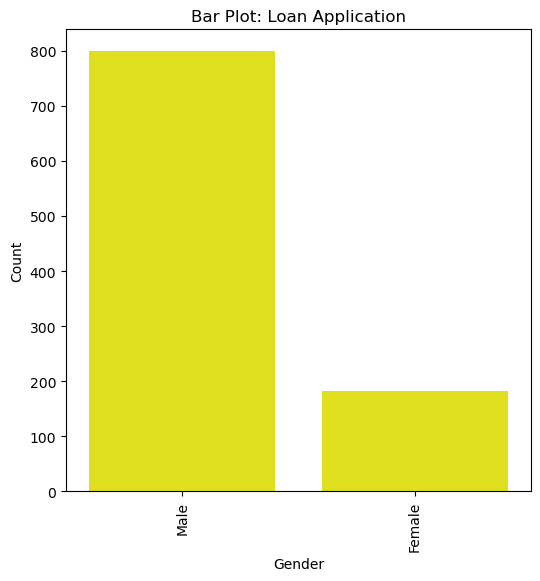

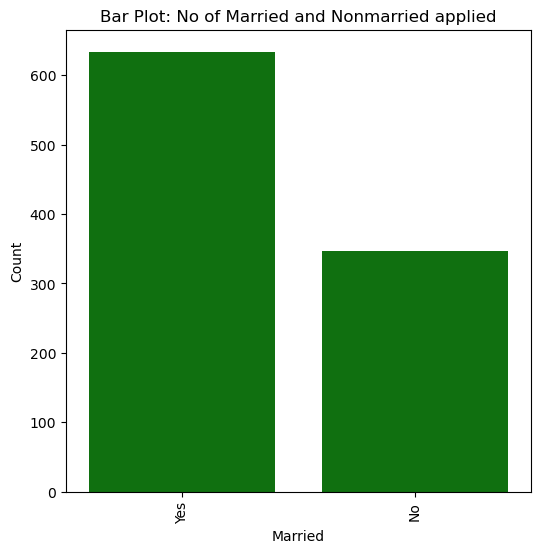

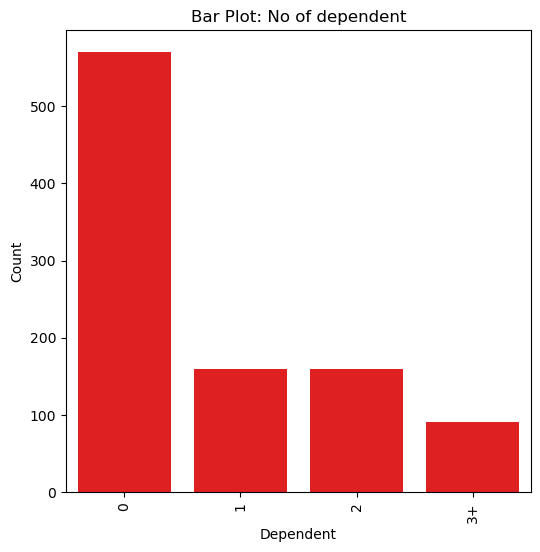

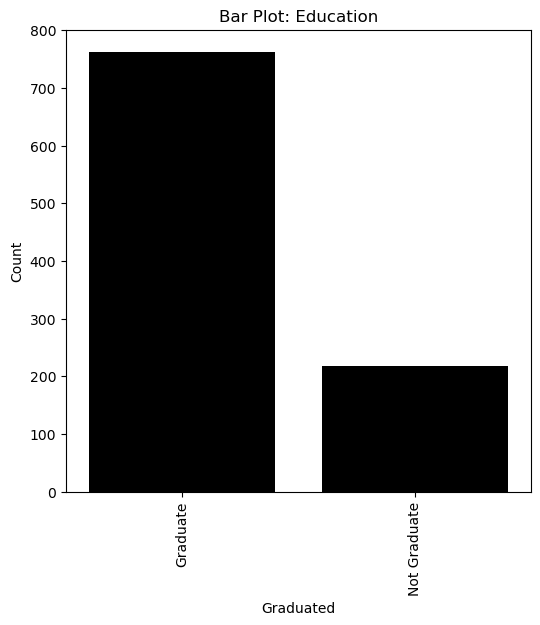

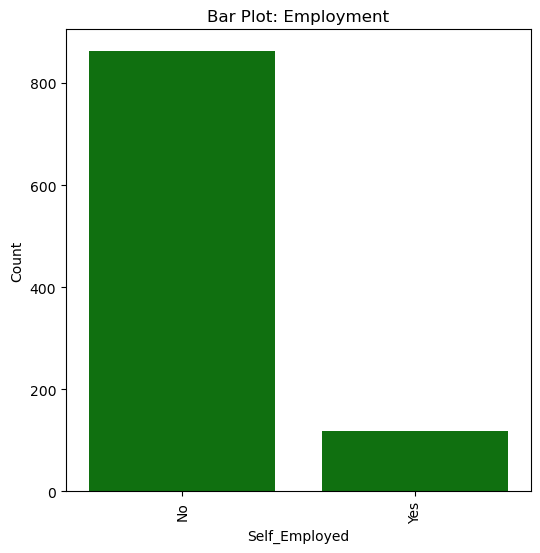

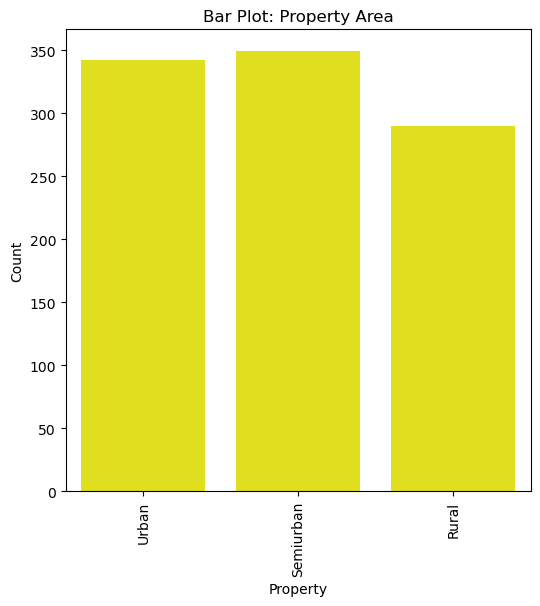

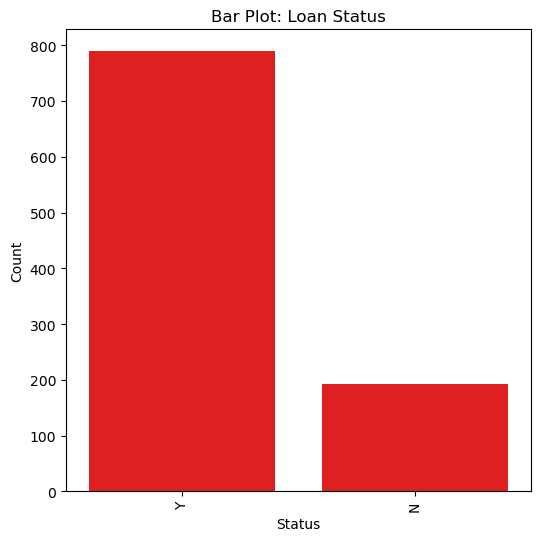

C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


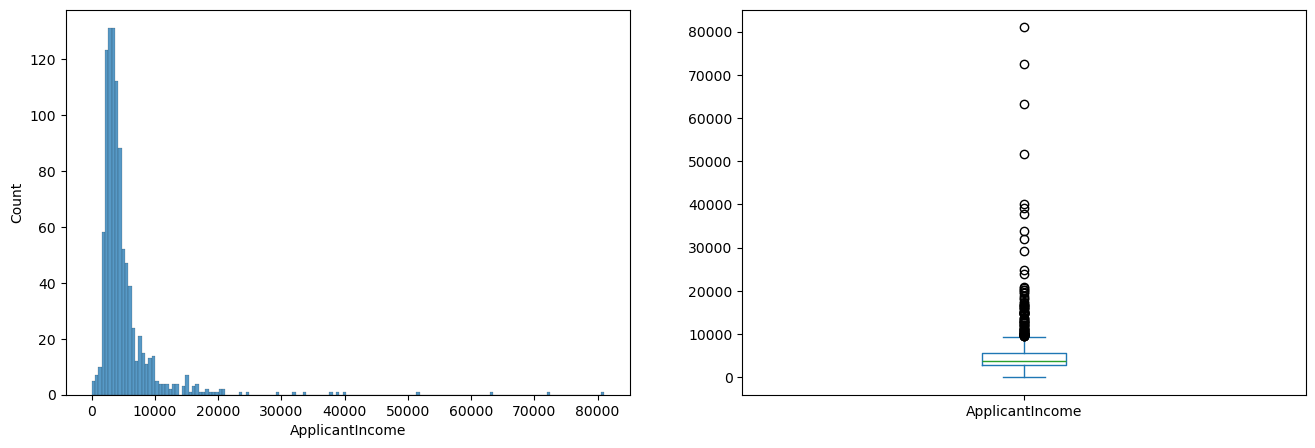

C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


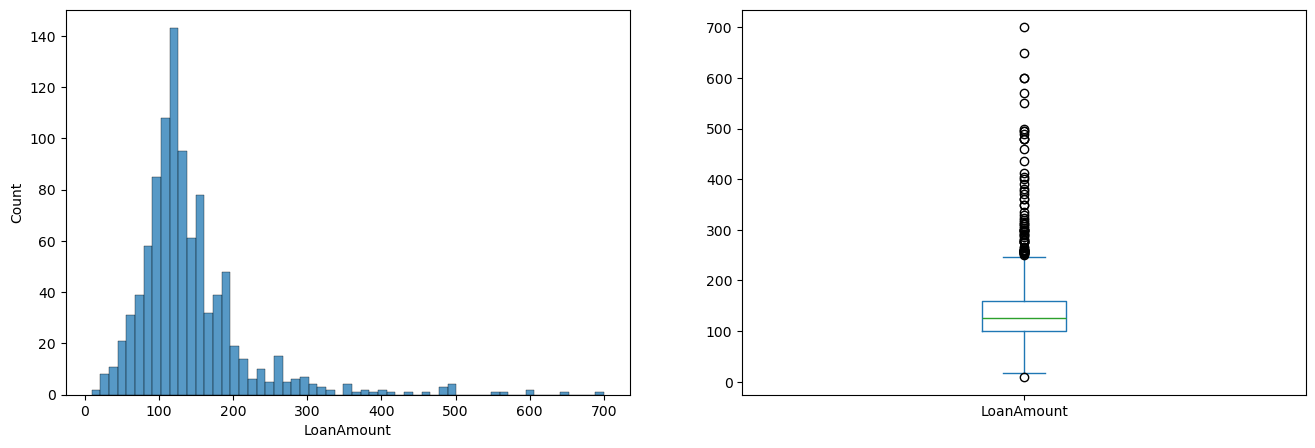

In [16]:
# Bar Plot
plt.figure(figsize=(6, 6))
sns.countplot(x='Gender', data=data,color="yellow")
plt.title('Bar Plot: Loan Application')
plt.xlabel("Gender")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Married', data=data,color="green")
plt.title('Bar Plot: No of Married and Nonmarried applied')
plt.xlabel("Married")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Dependents', data=data,color="red")
plt.title('Bar Plot: No of dependent')
plt.xlabel("Dependent")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Education', data=data,color="black")
plt.title('Bar Plot: Education')
plt.xlabel("Graduated")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Self_Employed', data=data,color="green")
plt.title('Bar Plot: Employment')
plt.xlabel("Self_Employed")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Property_Area', data=data,color="yellow")
plt.title('Bar Plot: Property Area')
plt.xlabel("Property")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(6, 6))
sns.countplot(x='Loan_Status', data=data,color="red")
plt.title('Bar Plot: Loan Status')
plt.xlabel("Status")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.show()

plt.figure(1) 
plt.subplot(121) 
sns.histplot(data['ApplicantIncome']) 
plt.subplot(122) 
data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(2) 
plt.subplot(121)
sns.histplot(data['LoanAmount']) 
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

In [17]:
# Dealing with outlier in case of Applicant income and Loan amount 

C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


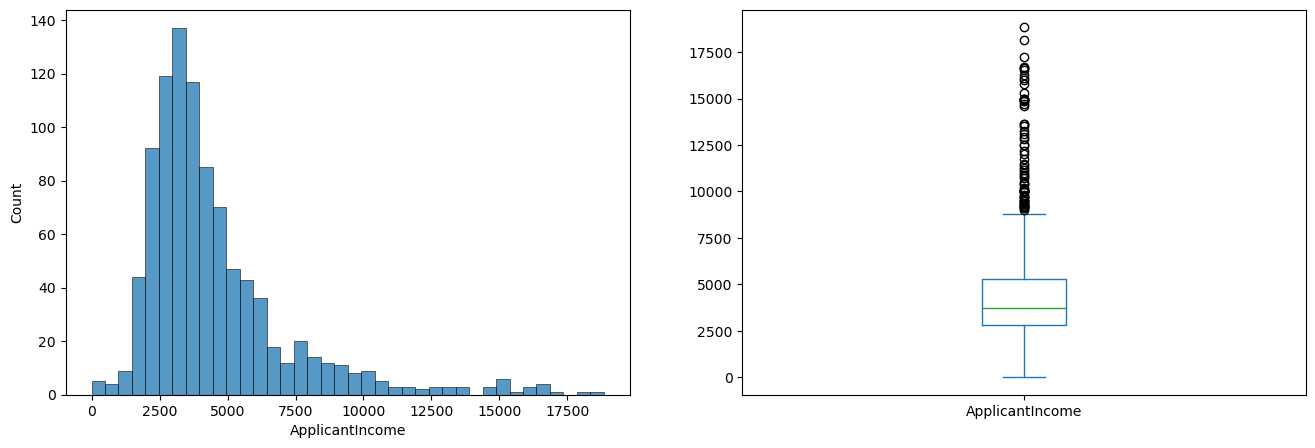

C:\Users\vanda\New folder\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


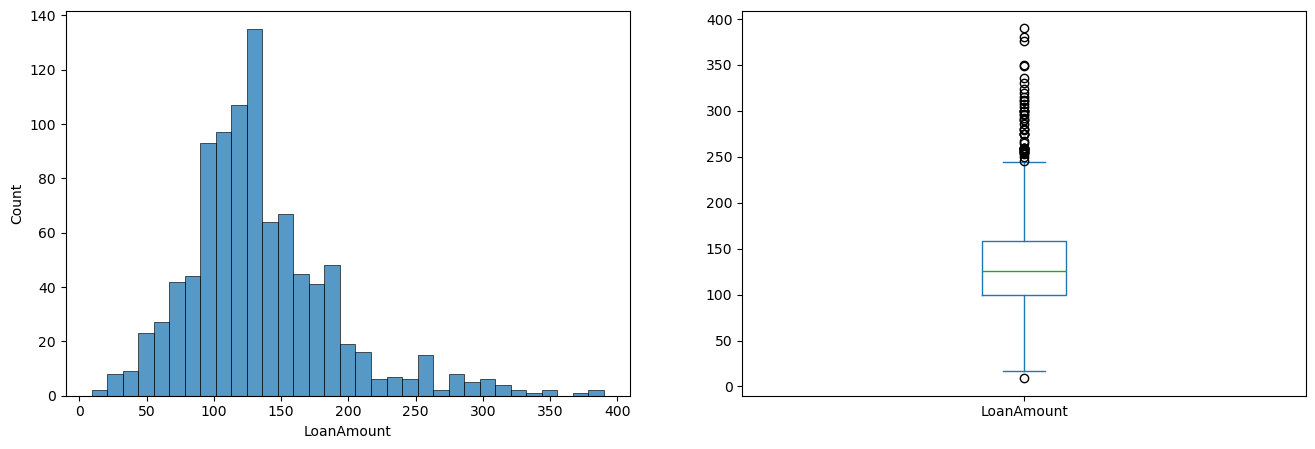

In [18]:
data = data[data['ApplicantIncome'] < 20000] 
data = data[data['LoanAmount'] < 400] 

plt.figure(1) 
plt.subplot(121) 
sns.histplot(data['ApplicantIncome']) 
plt.subplot(122) 
data['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

plt.figure(2) 
plt.subplot(121)
sns.histplot(data['LoanAmount']) 
plt.subplot(122)
data['LoanAmount'].plot.box(figsize=(16,5)) 
plt.show()

## Bivariate Analysis

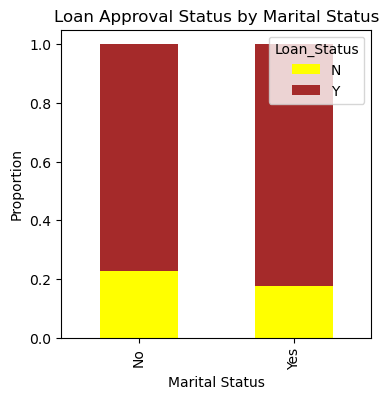

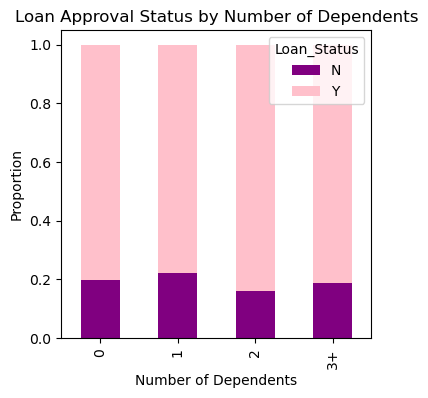

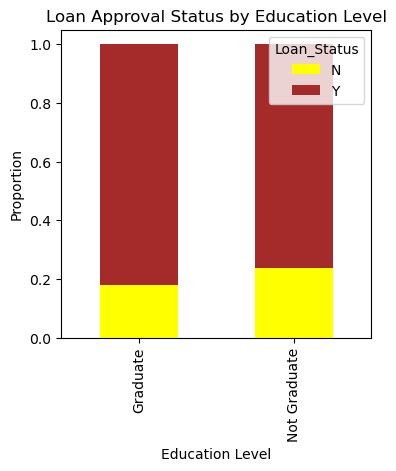

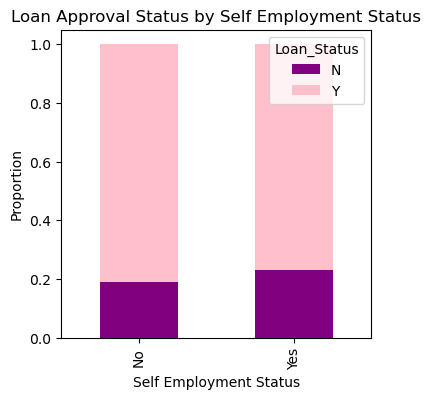

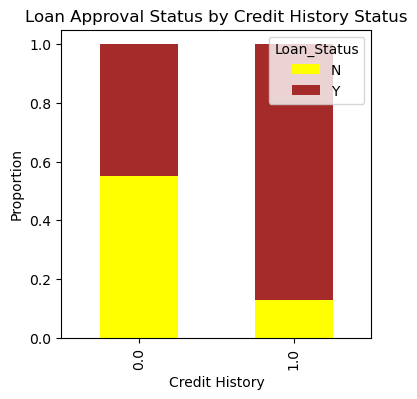

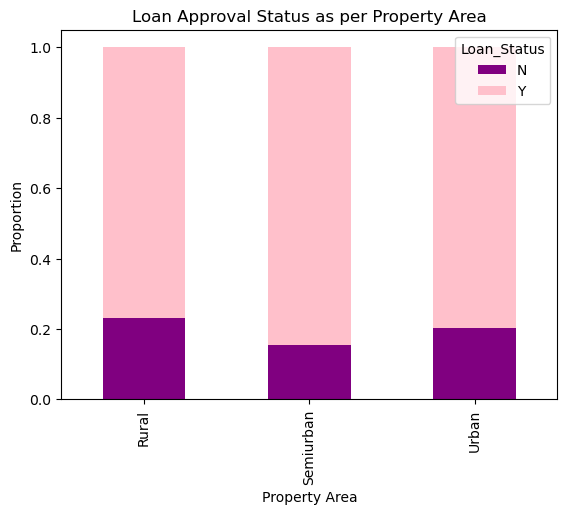

In [19]:
# Creating cross tabulation showing relationship between loan status and other categorical variable

Married=pd.crosstab(data['Married'],data['Loan_Status']) 
Dependents=pd.crosstab(data['Dependents'],data['Loan_Status']) 
Education=pd.crosstab(data['Education'],data['Loan_Status']) 
Self_Employed=pd.crosstab(data['Self_Employed'],data['Loan_Status']) 
Credit_History=pd.crosstab(data['Credit_History'],data['Loan_Status']) 
Property_Area=pd.crosstab(data['Property_Area'],data['Loan_Status']) 

# Normalize and plot each cross-tabulation
Married.div(Married.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True,  color=['yellow', 'brown'], figsize=(4,4))
plt.title('Loan Approval Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Proportion')
plt.show() 

Dependents.div(Dependents.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=['purple', 'pink'], figsize=(4,4))
plt.title('Loan Approval Status by Number of Dependents')
plt.xlabel('Number of Dependents')
plt.ylabel('Proportion')
plt.show() 

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=['yellow', 'brown'], figsize=(4,4)) 
plt.title('Loan Approval Status by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Proportion')
plt.show() 

Self_Employed.div(Self_Employed.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=['purple', 'pink'], figsize=(4,4))
plt.title('Loan Approval Status by Self Employment Status')
plt.xlabel('Self Employment Status')
plt.ylabel('Proportion')
plt.show()


Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=['yellow', 'brown'], figsize=(4,4))  
plt.title('Loan Approval Status by Credit History Status')
plt.xlabel('Credit History')
plt.ylabel('Proportion')
plt.show()

Property_Area.div(Property_Area.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, color=['purple', 'pink']) 
plt.title('Loan Approval Status as per Property Area')
plt.xlabel('Property Area')
plt.ylabel('Proportion')
plt.show()


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 954 entries, 0 to 980
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            954 non-null    object 
 1   Gender             954 non-null    object 
 2   Married            954 non-null    object 
 3   Dependents         954 non-null    object 
 4   Education          954 non-null    object 
 5   Self_Employed      954 non-null    object 
 6   ApplicantIncome    954 non-null    int64  
 7   CoapplicantIncome  954 non-null    float64
 8   LoanAmount         954 non-null    float64
 9   Loan_Amount_Term   954 non-null    float64
 10  Credit_History     954 non-null    float64
 11  Property_Area      954 non-null    object 
 12  Loan_Status        954 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 104.3+ KB


In [21]:
from sklearn import preprocessing
data['Loan_Status'] = data['Loan_Status'].map({'N': 0, 'Y': 1}).astype(int)
data = pd.get_dummies(data, columns=['Gender', 'Dependents', 'Married', 'Education', 'Self_Employed', 'Property_Area'])
standardScaler = StandardScaler()
columns_to_scale = ["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term"]
data[columns_to_scale] = standardScaler.fit_transform(data[columns_to_scale])

In [22]:
print(data)

      Loan_ID  ApplicantIncome  CoapplicantIncome  LoanAmount  \
0    LP001015         0.428480          -0.592521   -0.437238   
1    LP001022        -0.524195          -0.035418   -0.147581   
2    LP001031         0.169053           0.076003    1.336916   
3    LP001035        -0.789388           0.353070   -0.618275   
4    LP001051        -0.452132          -0.592521   -1.016554   
..        ...              ...                ...         ...   
976  LP002978        -0.587611          -0.592521   -1.143280   
977  LP002979        -0.153070          -0.592521   -1.704492   
978  LP002983         1.275943          -0.503385    2.151579   
979  LP002984         1.099749          -0.592521    0.956740   
980  LP002990         0.018801          -0.592521   -0.020855   

     Loan_Amount_Term  Credit_History  Loan_Status  Gender_Female  \
0            0.272222             1.0            1          False   
1            0.272222             1.0            1          False   
2           

<Axes: >

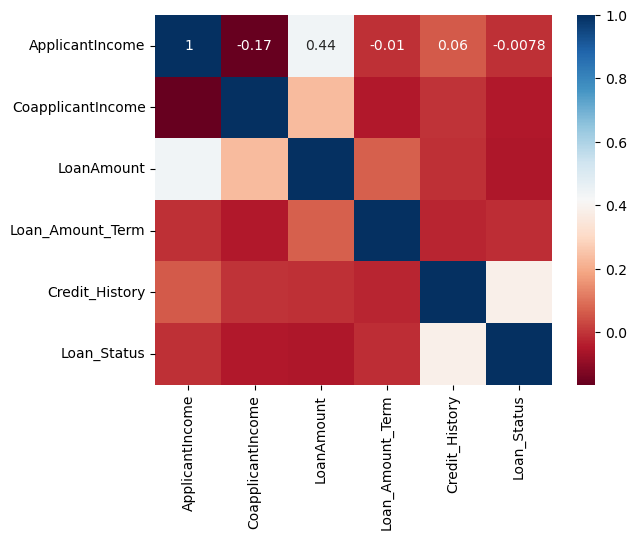

In [23]:
# Correlation Matrix
sns.heatmap(data[["ApplicantIncome", "CoapplicantIncome", "LoanAmount", "Loan_Amount_Term", "Credit_History","Loan_Status"]].corr(), annot=True, cmap='RdBu')

## Model Building

In [24]:
y = data["Loan_Status" ]
X = data.drop(["Loan_Status", 'Loan_ID'], axis=1)  # Corrected placement of axis parameter
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KGBoost

In [25]:
#KGBoost
# Define the parameter grid
gbm_param_grid = {
    "n_estimators": range(100, 1000, 100),
    "max_depth": range(3, 11),
    "learning_rate": np.linspace(0.01, 0.2, 10),
    "colsample_bytree" : np.linspace(0.6, 1, 5)
}

# Initialize XGBoost classifier
xgb_classifier = XGBClassifier()

# Randomized search
xgb_random = RandomizedSearchCV(estimator=xgb_classifier,param_distributions=gbm_param_grid,scoring="accuracy",n_iter=50,  # Adjust according to computational resources
cv=4,verbose=0)

# Fit the model
xgb_random.fit(X_train, y_train)

# Print best parameters
print(f'Best parameters: {xgb_random.best_params_}')

# Make predictions
y_pred = xgb_random.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

# Print confusion matrix
print(confusion_matrix(y_test, y_pred))


Best parameters: {'n_estimators': 400, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 1.0}
              precision    recall  f1-score   support

           0       0.54      0.24      0.33        29
           1       0.88      0.96      0.92       162

    accuracy                           0.85       191
   macro avg       0.71      0.60      0.63       191
weighted avg       0.83      0.85      0.83       191

[[  7  22]
 [  6 156]]


# Decision Tree

In [26]:
DT_classifier = DecisionTreeClassifier()
# Define hyperparameters to tune
param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2']
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=DT_classifier, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict the labels for the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.32      0.24      0.27        29
           1       0.87      0.91      0.89       162

    accuracy                           0.81       191
   macro avg       0.59      0.57      0.58       191
weighted avg       0.79      0.81      0.80       191

Confusion Matrix:
[[  7  22]
 [ 15 147]]


# Random Forest 

In [27]:

# Create a Random Forest classifier object
Rfc = RandomForestClassifier(random_state=0)

# Define hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum number of samples required at each leaf node
    'max_features': ['sqrt', 'log2']  # Number of features to consider when looking for the best split
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=Rfc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict the labels for the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.70      0.24      0.36        29
           1       0.88      0.98      0.93       162

    accuracy                           0.87       191
   macro avg       0.79      0.61      0.64       191
weighted avg       0.85      0.87      0.84       191

[[  7  22]
 [  3 159]]


In [28]:
## Linear Regression

In [29]:
LGC = LogisticRegression(solver='saga', penalty='l1', max_iter=10000)

# Define hyperparameters to tune
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100]  # Regularization strength
}

# Perform grid search with cross-validation
grid_search = GridSearchCV(estimator=LGC, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Predict the labels for the test data using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Print classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Best Hyperparameters: {'C': 10}
Classification Report:
              precision    recall  f1-score   support

           0       0.58      0.24      0.34        29
           1       0.88      0.97      0.92       162

    accuracy                           0.86       191
   macro avg       0.73      0.61      0.63       191
weighted avg       0.83      0.86      0.83       191

Confusion Matrix:
[[  7  22]
 [  5 157]]
